# Topic: Customer Clustering with RFM 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

Data understanding

In [5]:
products = pd.read_csv('Data/Products_with_Categories.csv')
transactions = pd.read_csv('Data/Transactions.csv')

In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [7]:
products.head(5)

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [9]:
transactions.head(5)

,Member_number,Date,productId,items
0,1808,21-07-2015,1,3
1,2552,05-01-2015,2,1
2,2300,19-09-2015,3,3
3,1187,12-12-2015,4,3
4,3037,01-02-2015,2,1


Data Pre-processing

In [10]:
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y").date()
transactions['Date'] = transactions['Date'].apply(string_to_date)
transactions['Date'] = transactions['Date'].astype('datetime64[ns]')

In [11]:
transactions.isnull().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [12]:
products.isnull().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [13]:
transactions.isna().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [14]:
products.isna().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [15]:
df = transactions.merge(products, on='productId', how='left')

In [16]:
df.head(5)

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy


In [17]:
df['total_sales'] = df['items'] * df['price']

In [18]:
df['transaction_id'] = range(1,len(df)+1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 38764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Member_number   38765 non-null  int64         
 1   Date            38765 non-null  datetime64[ns]
 2   productId       38765 non-null  int64         
 3   items           38765 non-null  int64         
 4   productName     38765 non-null  object        
 5   price           38765 non-null  float64       
 6   Category        38765 non-null  object        
 7   total_sales     38765 non-null  float64       
 8   transaction_id  38765 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.0+ MB


In [20]:
print('{:,} unique member_number'.format(transactions['Member_number'].nunique()))
print('Transactions timeframe from {} to {}'.format(transactions['Date'].min(), transactions['Date'].max()))

3,898 unique member_number
Transactions timeframe from 2014-01-01 00:00:00 to 2015-12-30 00:00:00


In [21]:
df.where(df['price']<0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

In [22]:
df.where(df['items']<=0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

RFM

In [23]:
max_date = df['Date'].max().date()

Recency = Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x: sum(x)

df_RFM = df.groupby('Member_number').agg({'Date':Recency,
                                          'transaction_id': Frequency,
                                          'total_sales':Monetary})


In [24]:
df_RFM.head()

,Date,transaction_id,total_sales
Member_number,,,
1000,35,13,53.80
1001,242,12,100.00
1002,122,8,70.30
1003,323,8,60.65
1004,28,21,204.96


In [25]:
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']

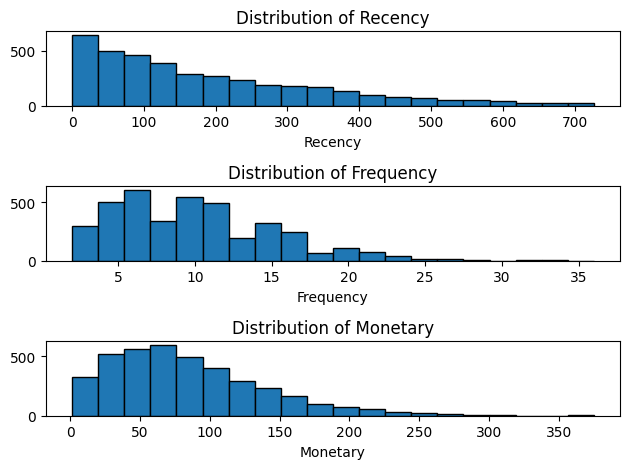

In [26]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_RFM['Recency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_RFM['Frequency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_RFM['Monetary'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều right skew và không phải normal distribution --> Log transfomation để giảm skewness

In [27]:
df_log_transformed = df_RFM.apply(lambda x: np.log1p(x) if x.name in ['Recency', 'Frequency', 'Monetary'] else x)

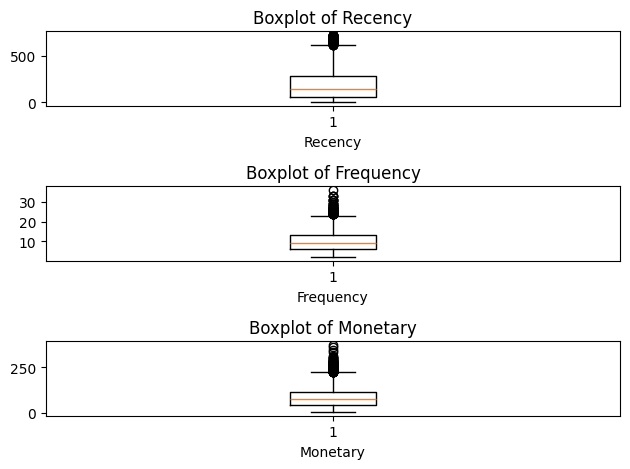

In [28]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_RFM['Recency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_RFM['Frequency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_RFM['Monetary']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều có nhiều upper outliers --> Robust Scaler để giảm ảnh hưởng của outliers

In [29]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
df_scaled = pd.DataFrame(robust.fit_transform(df_log_transformed[['Recency', 'Frequency', 'Monetary']]), 
                         columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'], 
                         index=df_RFM.index)

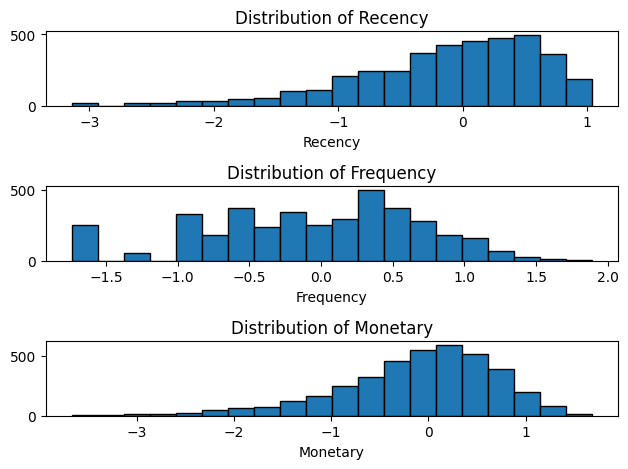

In [30]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_scaled['Recency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_scaled['Frequency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_scaled['Monetary_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

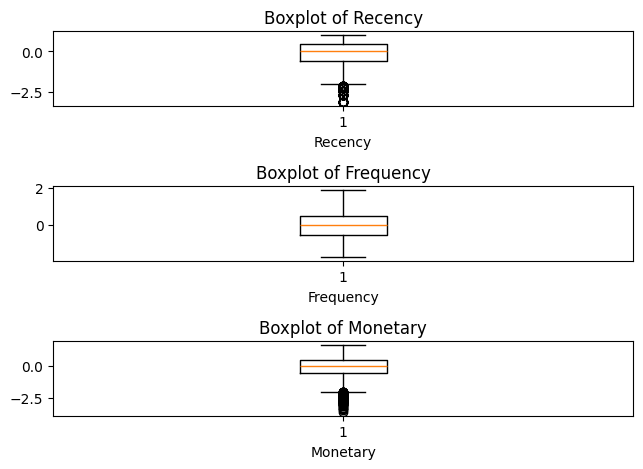

In [31]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_scaled['Recency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_scaled['Frequency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_scaled['Monetary_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

In [32]:
df_scaled.head()

,Recency_scaled,Frequency_scaled,Monetary_scaled
Member_number,,,
1000,-0.869699,0.485427,-0.341540
1001,0.340472,0.378512,0.299574
1002,-0.091033,-0.152003,-0.065556
1003,0.522790,-0.152003,-0.218039
1004,-1.006730,1.137504,1.046730


Kmeans

Tìm k theo Elbow

In [33]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

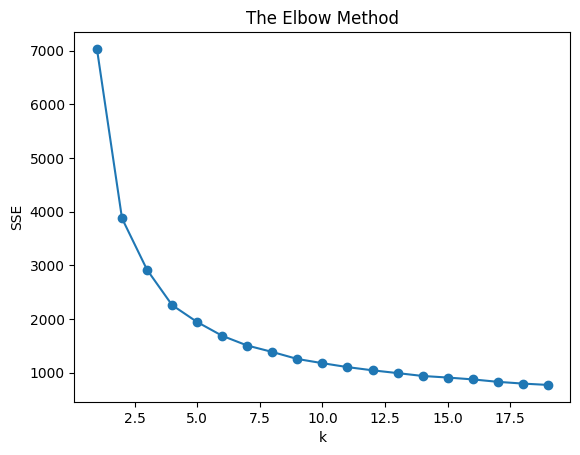

In [34]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.show()

In [35]:
# Build model with k=5
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_scaled)
model.labels_.shape

(3898,)

In [36]:
df_scaled["Cluster"] = model.labels_
df_scaled.groupby('Cluster').agg({
    'Recency_scaled':'mean',
    'Frequency_scaled':'mean',
    'Monetary_scaled':['mean', 'count']}).round(2)

Recency_scaled Frequency_scaled Monetary_scaled      
                  mean             mean            mean count
Cluster                                                      
0                -1.42             0.14            0.01   563
1                 0.30            -0.57           -0.57   993
2                 0.13             0.19            0.16  1188
3                 0.42            -1.45           -1.75   397
4                -0.46             0.84            0.77   757

In [37]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = df_scaled.groupby('Cluster').agg({
    'Recency_scaled': 'mean',
    'Frequency_scaled': 'mean',
    'Monetary_scaled': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,-1.0,0.0,0.0,563,14.44
1,Cluster 1,0.0,-1.0,-1.0,993,25.47
2,Cluster 2,0.0,0.0,0.0,1188,30.48
3,Cluster 3,0.0,-1.0,-2.0,397,10.18
4,Cluster 4,-0.0,1.0,1.0,757,19.42


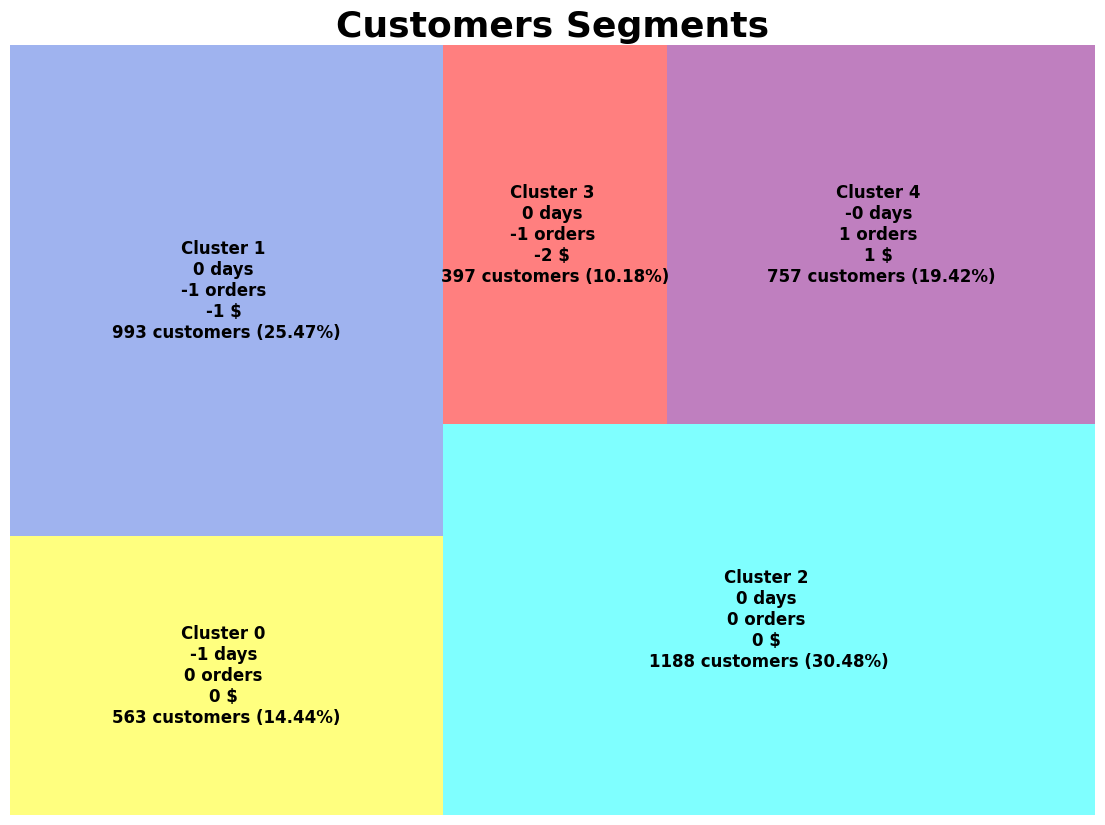

In [38]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

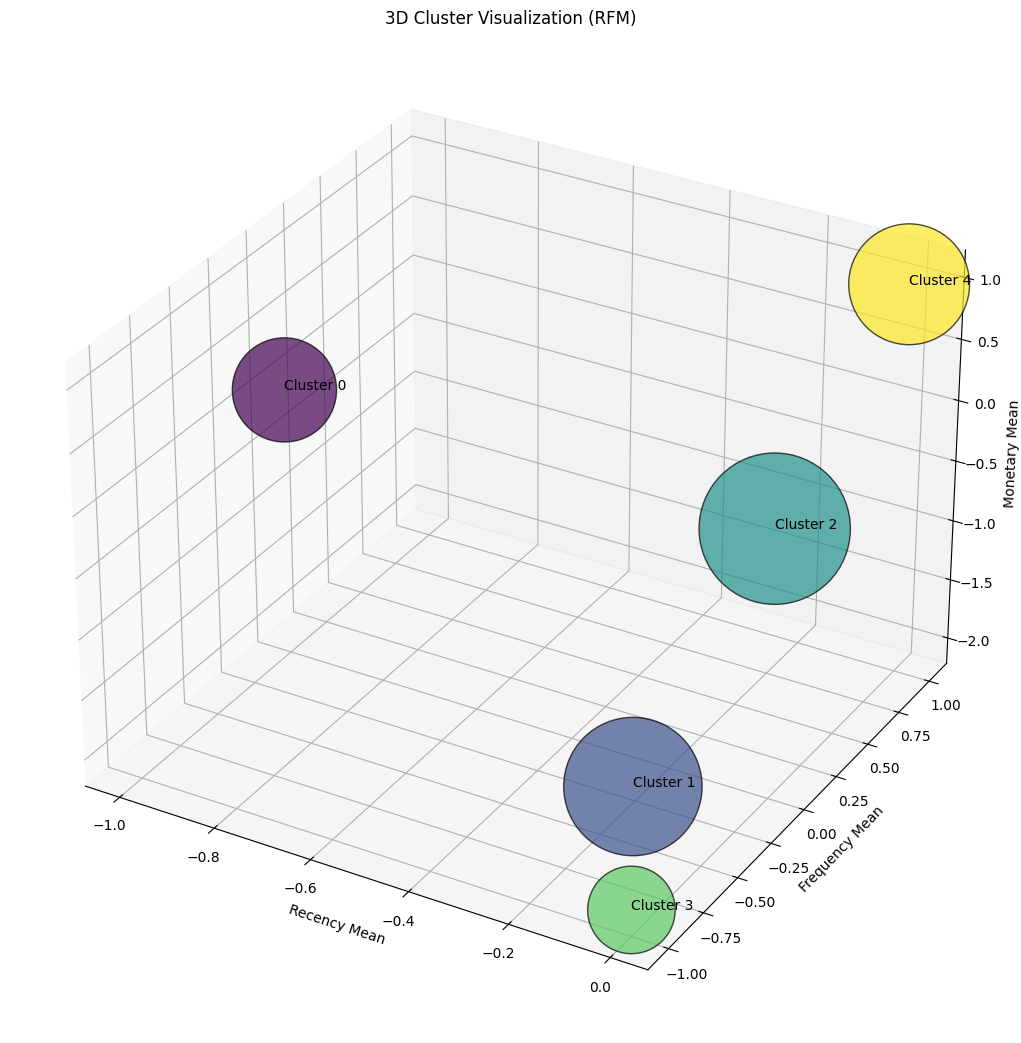

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Chuẩn bị dữ liệu
x = rfm_agg2['RecencyMean']
y = rfm_agg2['FrequencyMean']
z = rfm_agg2['MonetaryMean']
size = rfm_agg2['Count'] * 10  # Điều chỉnh kích thước theo số lượng khách hàng

# Chuyển đổi cụm về số để dùng làm màu
clusters = rfm_agg2['Cluster'].astype('category').cat.codes

# Tạo figure 3D
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot 3D
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', s=size, alpha=0.7, edgecolors='black')

# Gán nhãn trục
ax.set_xlabel("Recency Mean")
ax.set_ylabel("Frequency Mean")
ax.set_zlabel("Monetary Mean")
ax.set_title("3D Cluster Visualization (RFM)")

# Hiển thị tên cụm tại mỗi điểm
for i, label in enumerate(rfm_agg2['Cluster']):
    ax.text(x[i], y[i], z[i], label, fontsize=10, color='black')

# Hiển thị biểu đồ
plt.show()


Tìm k với silhouette

In [40]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []

for k in range(2, 8):
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, kmeanModel.labels_))

id_max = np.argmax(scores)
print(scores)
print("k=", id_max + 2)


[0.34353817790016783, 0.4751966259694946, 0.5461983667687624, 0.549595112058823, 0.5295370729736707, 0.5039895013952761]
k= 5


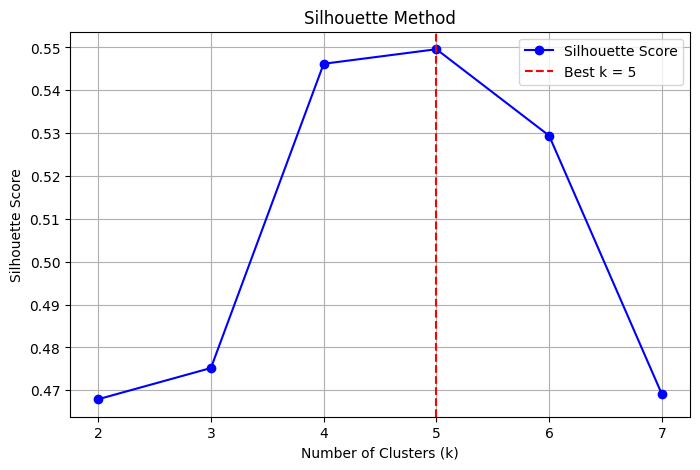

Best k = 5


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
K = range(2, 8)  # Giá trị k từ 2 đến 7

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeanModel.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, kmeanModel.labels_))

# Tìm k tốt nhất
id_max = np.argmax(scores)
best_k = K[id_max]

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(K, scores, marker='o', linestyle='-', color='b', label="Silhouette Score")
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.legend()
plt.grid(True)
plt.show()

print("Best k =", best_k)

C:\Users\khoah\AppData\Local\Temp\ipykernel_32492\640257472.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


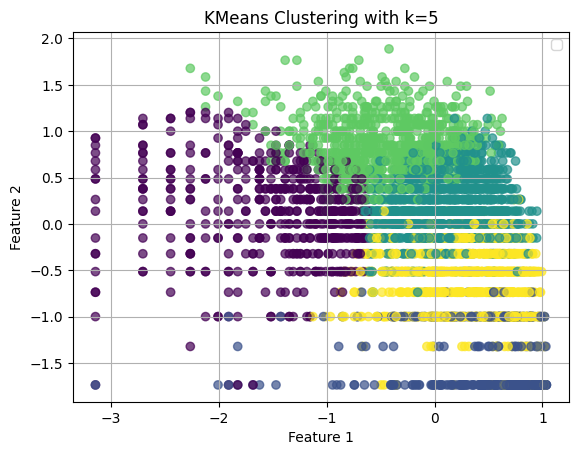

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Chạy mô hình K-Means với k=5
kmeanModel = KMeans(n_clusters=5, random_state=42)
kmeanModel.fit(df_scaled)

# Lấy tọa độ centroid và nhãn của từng điểm dữ liệu
labels = kmeanModel.labels_

# ------ Visualize kết quả ------
df_group = pd.Series(labels)


# Vẽ các điểm dữ liệu, tô màu theo cluster
plt.scatter(df_scaled.values[:, 0], df_scaled.values[:, 1], c=df_group, cmap='viridis', alpha=0.7)

# Hiển thị biểu đồ
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering with k=5")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\khoah\AppData\Local\Temp\ipykernel_32492\3924525581.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


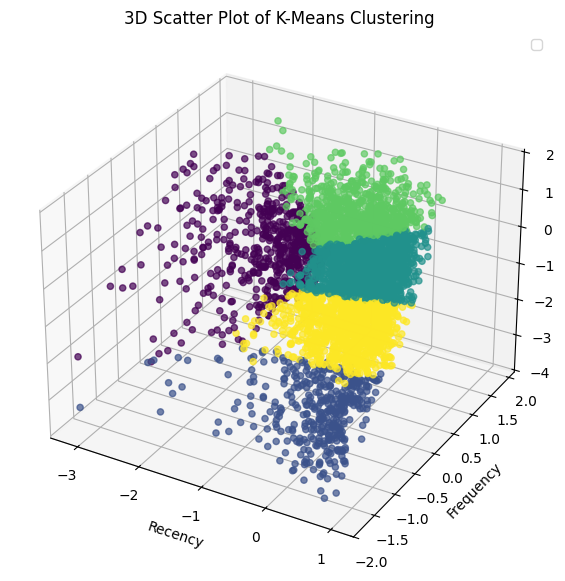

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Giả sử dữ liệu của bạn có ít nhất 3 features
k = 5  # Chọn số cụm
X_scaled = df_scaled.to_numpy()  # Chuyển DataFrame về NumPy array nếu chưa


# Thực hiện KMeans
kmeanModel = KMeans(n_clusters=k, random_state=42)
kmeanModel.fit(X_scaled)

# Lấy tọa độ tâm cụm và nhãn của từng điểm
centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

# Vẽ biểu đồ scatter plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ các điểm dữ liệu, tô màu theo cluster
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis', alpha=0.7)


# Thiết lập tiêu đề và nhãn trục
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Moneraty")
ax.set_title("3D Scatter Plot of K-Means Clustering")

plt.legend()
plt.show()


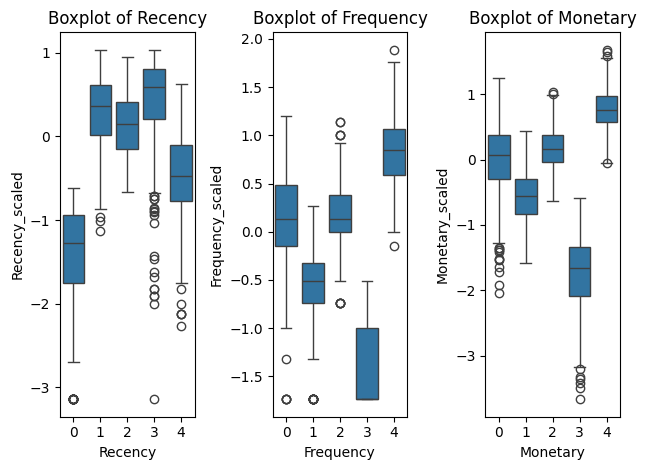

In [50]:
# Vẽ phân phối của 'Recency'
plt.subplot(1, 3, 1) # 3 hàng, 1 cột, vị trí thứ nhất
sns.boxplot(x='Cluster', y='Recency_scaled', data=df_scaled) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(1, 3, 2) # 3 hàng, 1 cột, vị trí thứ hai
sns.boxplot(x='Cluster', y='Frequency_scaled', data=df_scaled) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(1, 3, 3) # 3 hàng, 1 cột, vị trí thứ ba
sns.boxplot(x='Cluster', y='Monetary_scaled', data=df_scaled) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()